## 1. Conjunto de datos

In [12]:
from tensorflow.keras import datasets

In [13]:
fashion_mnist = datasets.fashion_mnist

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 2. Visualización del conjunto de datos

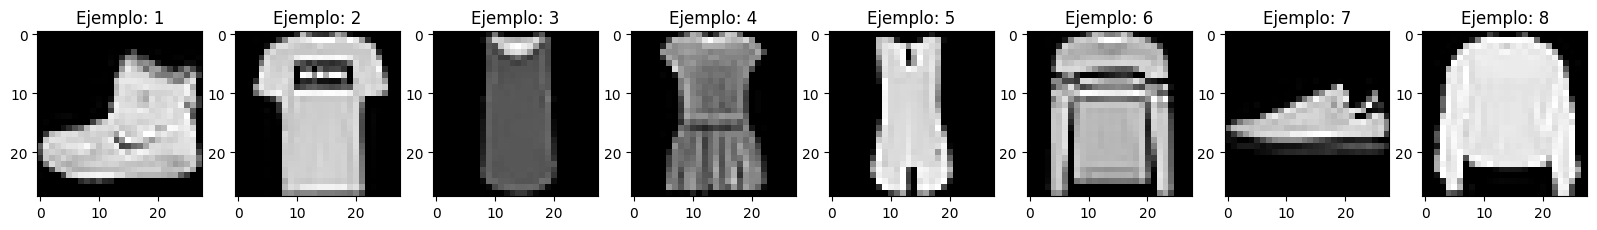

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [16]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  60000
Longitud subconjunto de pruebas:  10000


## 3. Transformación del conjunto de datos

In [17]:
#tomar las imagnes y transformarlas en un unico veector de longitud 28*28, normalizar el valor de los pixeles
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [18]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [19]:
#
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4. Construcción del modelo

In [23]:
#entrrnar la RNA de 4 capas, una de 300 neuronas, un de 100 y una de 19, y la primera capa (input layer) que son las caracteristicas de entrada
#osea el valor de los pixeles
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [24]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

In [25]:
history = network.fit(X_train_prep, 
                      y_train_prep,
                      batch_size=32,
                      epochs=15, 
                      validation_data=(X_test_prep, y_test_prep))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - Precision: 0.8456 - accuracy: 0.7551 - loss: 0.7066 - val_Precision: 0.8837 - val_accuracy: 0.8508 - val_loss: 0.4195
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - Precision: 0.8877 - accuracy: 0.8596 - loss: 0.3803 - val_Precision: 0.8899 - val_accuracy: 0.8623 - val_loss: 0.3771
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - Precision: 0.8985 - accuracy: 0.8743 - loss: 0.3378 - val_Precision: 0.8949 - val_accuracy: 0.8704 - val_loss: 0.3625
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - Precision: 0.9058 - accuracy: 0.8845 - loss: 0.3109 - val_Precision: 0.8972 - val_accuracy: 0.8797 - val_loss: 0.3378
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - Precision: 0.9105 - accuracy: 0.8903 - loss: 0.2936 - val_Precision: 0.8970 - val_accuracy: 0.8770 - val_loss: 0.3383
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - Precision: 0.9173 - accuracy: 0.8990 - loss: 0.2706 - val_Prec

In [61]:
import numpy as np
from PIL import Image
from sklearn.preprocessing import Normalizer
import cv2
import numpy as np
from matplotlib import pyplot as plt

def quitar_fondo(imagen_ruta, output_ruta='output_sin_fondo.png'):
    # Cargar imagen
    img = cv2.imread(imagen_ruta)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Crear máscara para grabCut
    mask = np.zeros(img.shape[:2], np.uint8)

    # Crear modelos temporales (obligatorios)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Selección del rectángulo (puedes ajustar si el objeto no está centrado)
    height, width = img.shape[:2]
    rect = (10, 10, width-20, height-20)  # (x, y, w, h)

    # Aplicar GrabCut
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Convertir máscara a binaria: 0 y 2 fondo, 1 y 3 primer plano
    mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

    # Aplicar máscara a la imagen original
    img_sin_fondo = img_rgb * mask2[:, :, np.newaxis]

    # Guardar resultado
    cv2.imwrite(output_ruta, cv2.cvtColor(img_sin_fondo, cv2.COLOR_RGB2BGR))

# Ejemplo de uso
quitar_fondo('prendas/camisas.png', 'bad_fondo.png')

# 1. Cargar la imagen (ajusta el nombre del archivo si es diferente)
img = Image.open('bad_fondo.png').convert('L')  # Convertir a escala de grises
img = img.resize((28, 28))                   # Redimensionar a 28x28

# 2. Convertir imagen a un vector de 784 valores
img_array = np.array(img)
img_vector = img_array.reshape(1, 28 * 28)

# 3. Normalizar la imagen como hiciste con el conjunto de entrenamiento
transformer = Normalizer()
transformer.fit(X_train.reshape((60000, 28*28)))  # Entrenamiento igual al original
img_vector = transformer.transform(img_vector)

# 4. Predecir con el modelo
prediction = network.predict(img_vector)
predicted_class = np.argmax(prediction)

# 5. Mostrar resultado
labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
print(f'La imagen parece ser: {labels[predicted_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
La imagen parece ser: Shirt
